In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('final_good.csv')

In [3]:
df.head()

,Flight ID,Aircraft Type,Departure Airport,Arrival Airport,Distance (km),Duration (hours),Cruising Altitude (ft),Wind Speed (km/h),Temperature (°C),SAF Percentage,Jet A-1 Percentage,Fuel Consumption (liters),Passenger Load,Cargo Load (kg),CO2 Emissions (kg)
0,F0001,Boeing 777,LHR,MUC,2917,4.16,36890,116,36,0.088447,0.911553,27629,126,6349,82695.94
1,F0002,Boeing 777,EDI,MXP,1067,1.38,31966,8,8,0.010645,0.989355,24324,346,9564,61440.55
2,F0003,Boeing 787,BLQ,BCN,11180,16.11,30009,64,3,0.006474,0.993526,25948,162,5351,82779.52
3,F0004,Airbus A350,FRA,LYS,6851,7.85,33703,49,0,0.021204,0.978796,33677,247,8512,92117.27
4,F0005,Boeing 777,NAP,LHR,8087,10.01,37432,81,-10,0.070372,0.929628,22371,234,7284,66366.41


In [4]:
df.describe()

,Distance (km),Duration (hours),Cruising Altitude (ft),Wind Speed (km/h),Temperature (°C),SAF Percentage,Jet A-1 Percentage,Fuel Consumption (liters),Passenger Load,Cargo Load (kg),CO2 Emissions (kg)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,6111.757600,8.273548,35560.153600,59.400000,12.729600,0.040402,0.959598,20414.984800,199.681600,6218.450400,57305.753856
std,3378.397483,4.700575,3251.916066,34.497792,16.091988,0.032555,0.032555,9324.836602,88.063122,3252.033498,26704.539069
min,302.000000,0.360000,30001.000000,0.000000,-15.000000,0.000000,0.900096,5035.000000,50.000000,502.000000,12892.460000
25%,3238.000000,4.347500,32673.500000,31.000000,-1.000000,0.007483,0.930785,12186.750000,124.000000,3458.750000,34235.130000
50%,6019.000000,8.020000,35610.500000,59.000000,13.000000,0.037838,0.962162,20251.000000,198.500000,6176.500000,56245.760000
75%,9064.500000,12.052500,38445.500000,88.000000,27.000000,0.069215,0.992517,27831.500000,280.000000,8924.250000,78147.177500
max,11997.000000,19.880000,40999.000000,120.000000,40.000000,0.099904,1.000000,59888.000000,350.000000,11992.000000,175959.370000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Flight ID                  2500 non-null   object 
 1   Aircraft Type              2500 non-null   object 
 2   Departure Airport          2500 non-null   object 
 3   Arrival Airport            2500 non-null   object 
 4   Distance (km)              2500 non-null   int64  
 5   Duration (hours)           2500 non-null   float64
 6   Cruising Altitude (ft)     2500 non-null   int64  
 7   Wind Speed (km/h)          2500 non-null   int64  
 8   Temperature (°C)           2500 non-null   int64  
 9   SAF Percentage             2500 non-null   float64
 10  Jet A-1 Percentage         2500 non-null   float64
 11  Fuel Consumption (liters)  2500 non-null   int64  
 12  Passenger Load             2500 non-null   int64  
 13  Cargo Load (kg)            2500 non-null   int64

In [6]:
print('missing values in each Column ')
df.isnull().sum()

missing values in each Column 


Flight ID                    0
Aircraft Type                0
Departure Airport            0
Arrival Airport              0
Distance (km)                0
Duration (hours)             0
Cruising Altitude (ft)       0
Wind Speed (km/h)            0
Temperature (°C)             0
SAF Percentage               0
Jet A-1 Percentage           0
Fuel Consumption (liters)    0
Passenger Load               0
Cargo Load (kg)              0
CO2 Emissions (kg)           0
dtype: int64

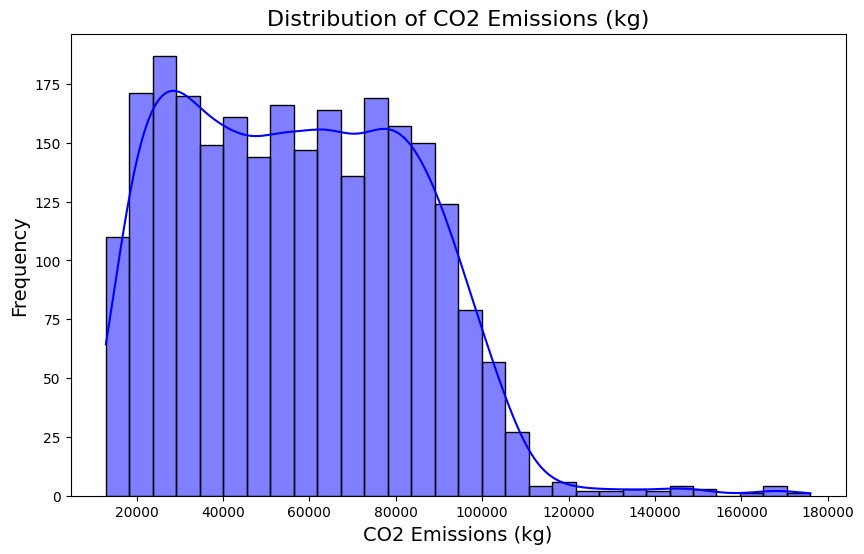

In [7]:
# Target value distribution 

plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Emissions (kg)'], bins=30, kde=True, color='blue')
plt.title('Distribution of CO2 Emissions (kg)', fontsize=16)
plt.xlabel('CO2 Emissions (kg)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [8]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Flight ID', 'Aircraft Type', 'Departure Airport', 'Arrival Airport'], dtype='object')


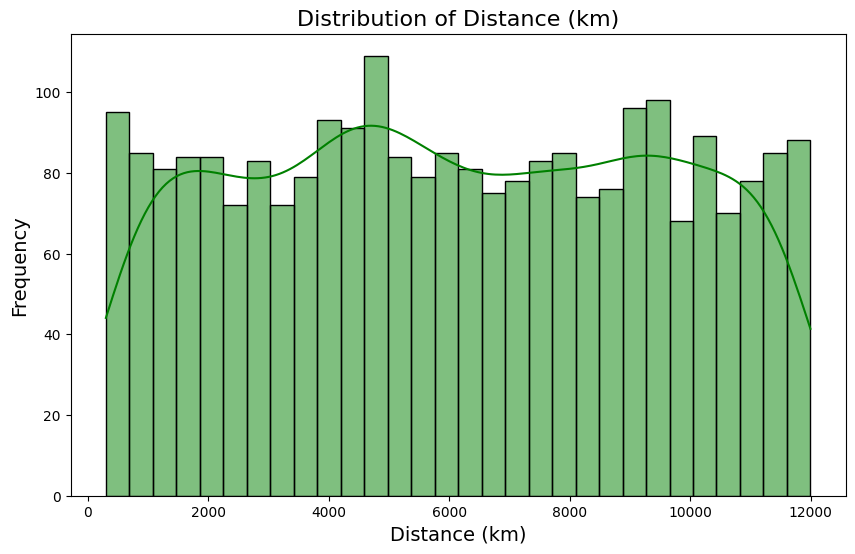

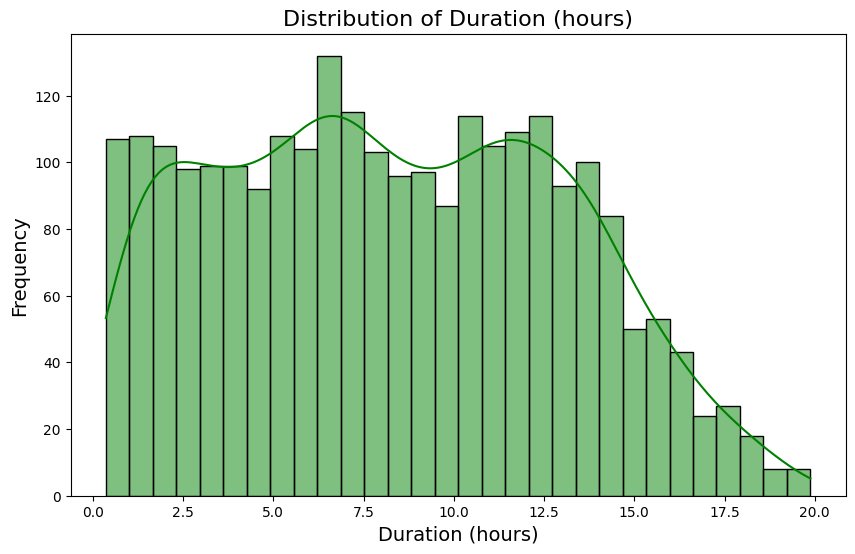

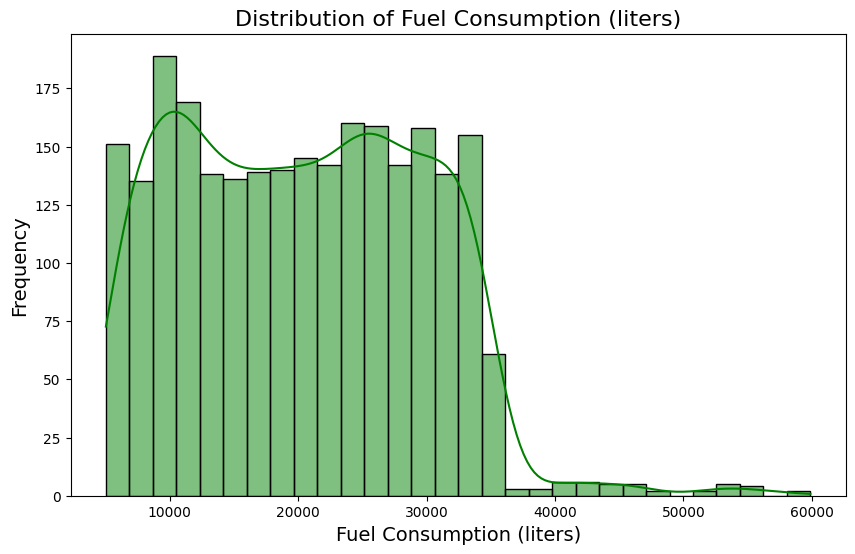

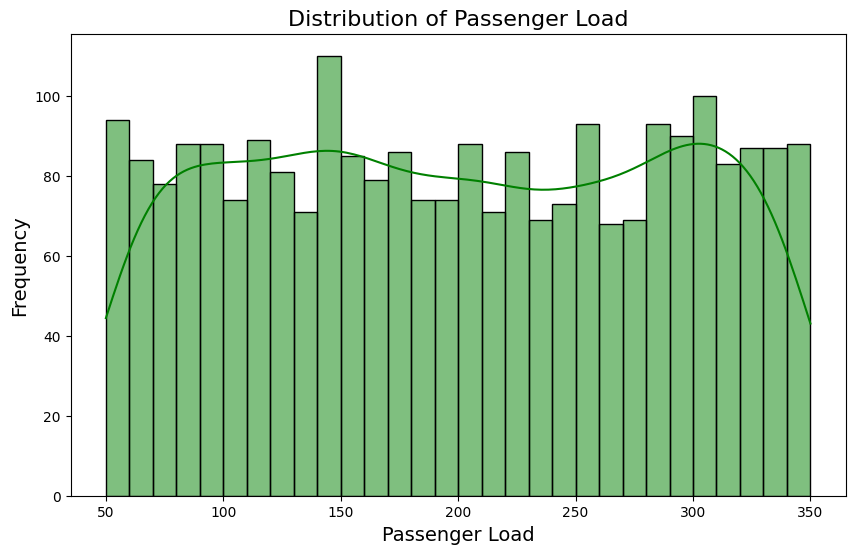

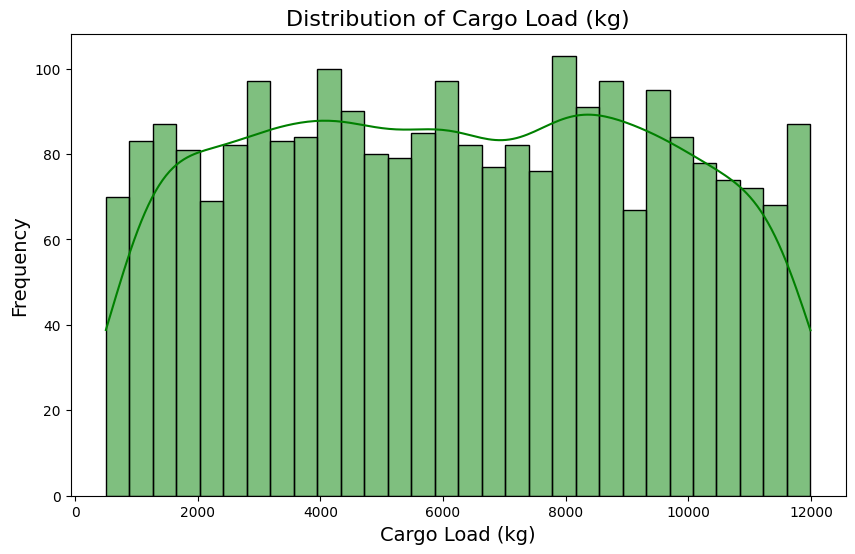

In [10]:
# Feature distribution 

numeric_features = ['Distance (km)', 'Duration (hours)', 'Fuel Consumption (liters)', 'Passenger Load', 'Cargo Load (kg)']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

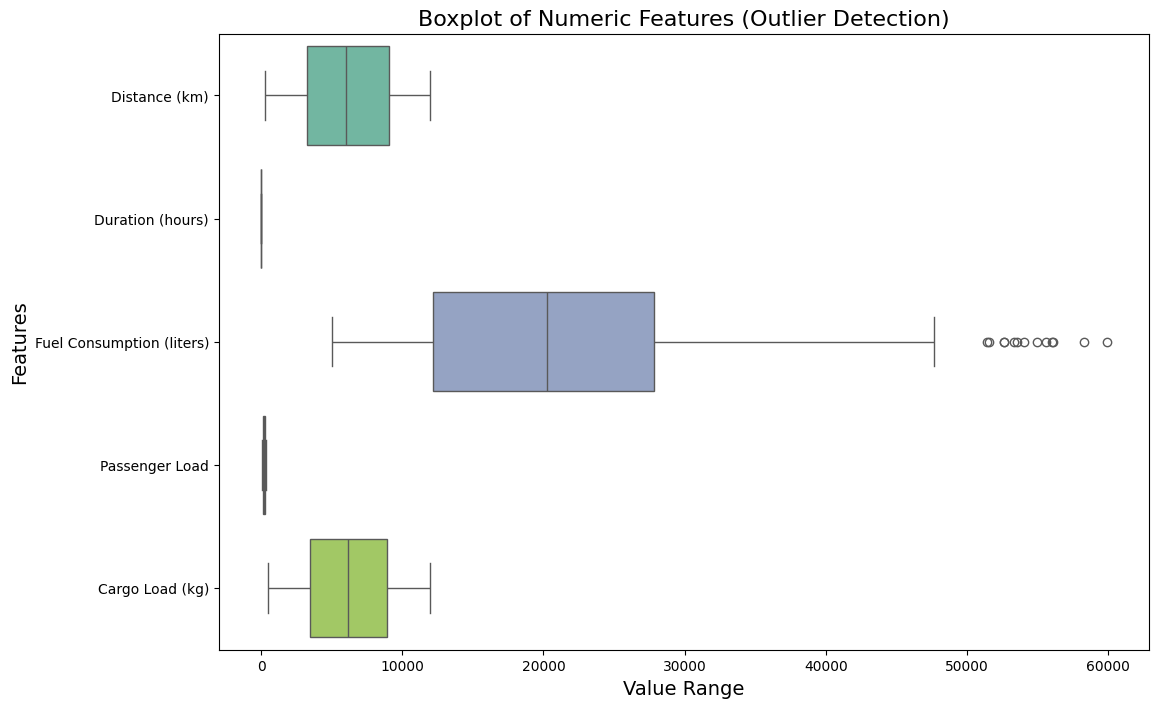

In [11]:
#Outlier detection

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_features], orient="h", palette="Set2")
plt.title('Boxplot of Numeric Features (Outlier Detection)', fontsize=16)
plt.xlabel('Value Range', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


KeyError: 'CO2 Emissions (g)'

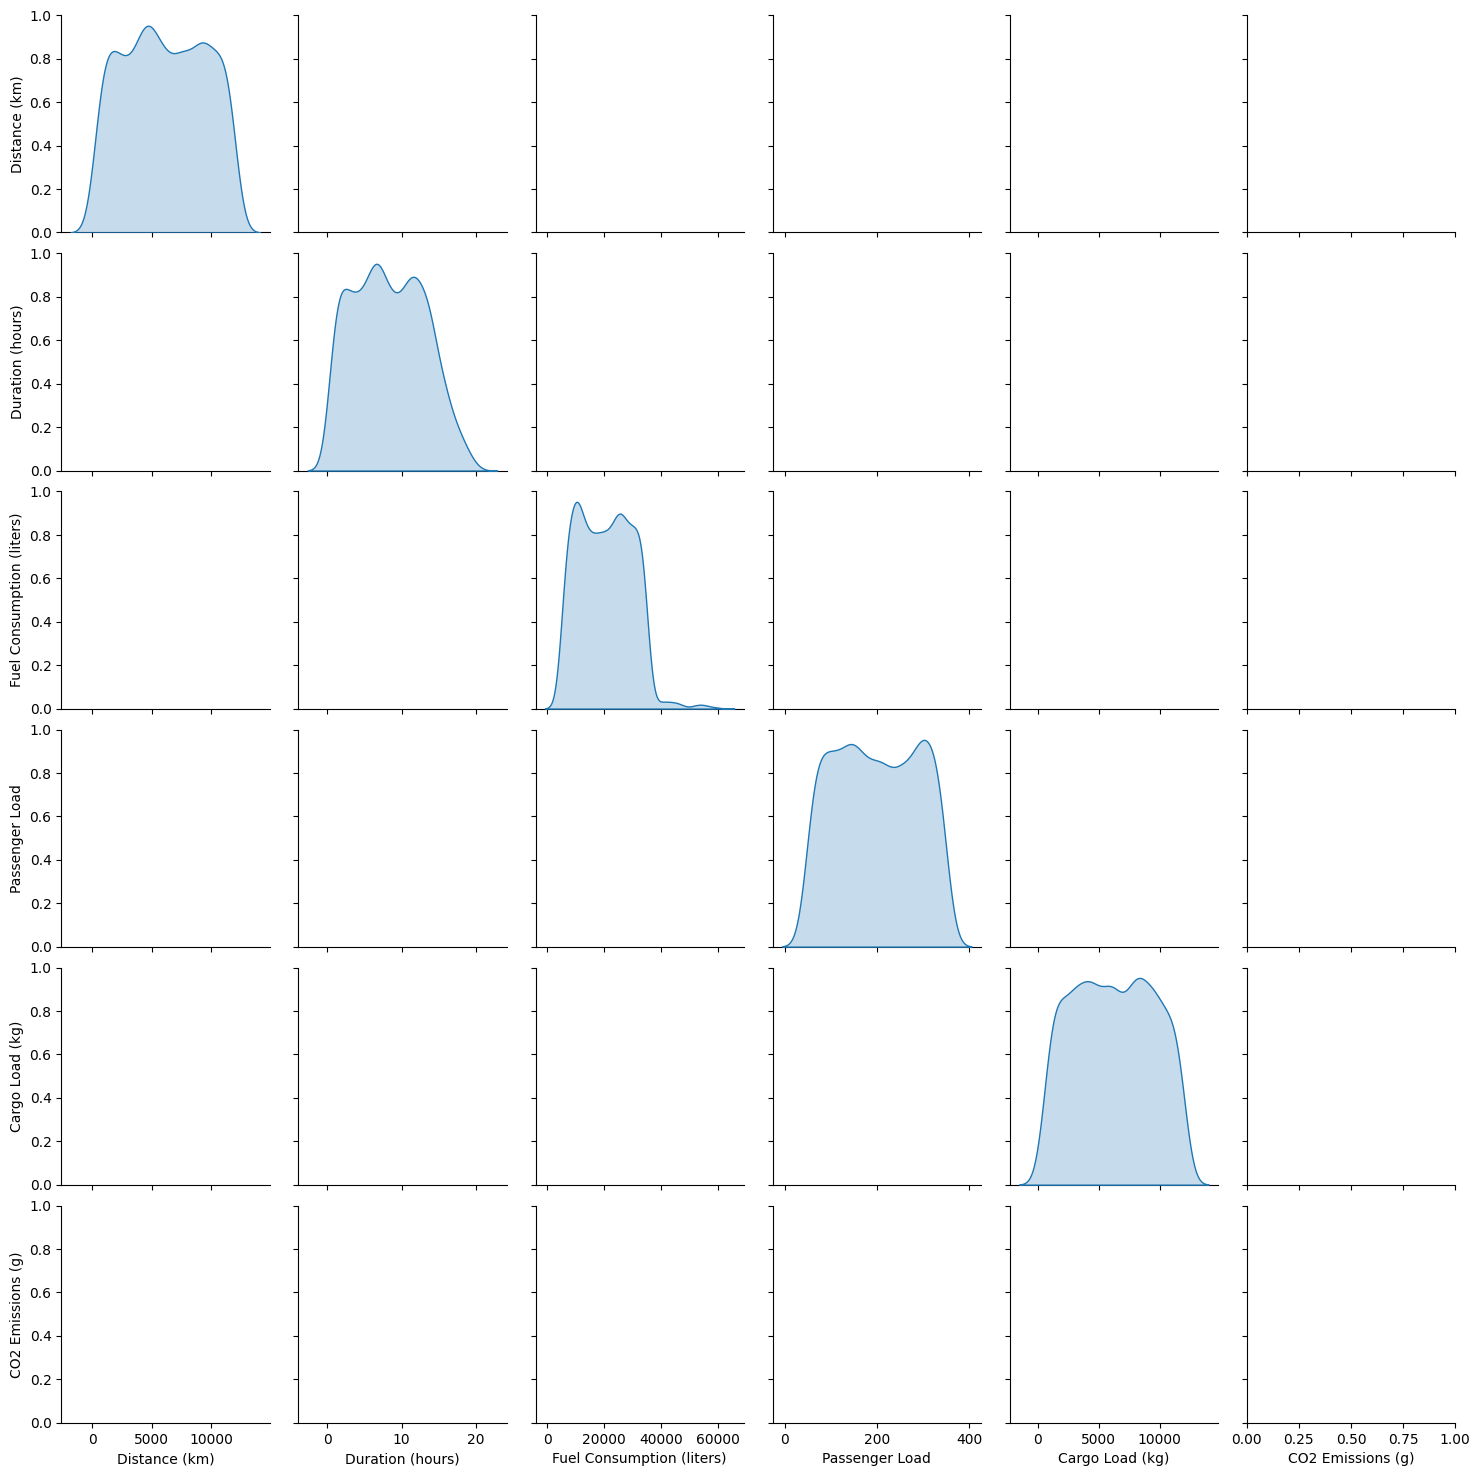

In [12]:
#pairoplot to see a visual representation between the key features and the target variable

sns.pairplot(df, vars=numeric_features + ['CO2 Emissions (g)'], diag_kind='kde')
plt.show()